In [1]:
import pandas as pd
match=pd.read_csv('./matches.csv')
match.sample(7)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
85,86,IPL-2008,Mumbai,07-05-2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen,NaN
72,73,IPL-2008,Chandigarh,27-04-2008,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Kings XI Punjab,0,4,SM Katich,"Punjab Cricket Association Stadium, Mohali",RE Koertzen,I Shivram,NaN
394,395,IPL-2013,Mumbai,13-04-2013,Mumbai Indians,Pune Warriors,Mumbai Indians,bat,normal,0,Mumbai Indians,41,0,RG Sharma,Wankhede Stadium,S Ravi,SJA Taufel,NaN
138,139,IPL-2009,Durban,01-05-2009,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,8,0,Yuvraj Singh,Kingsmead,HDPK Dharmasena,S Ravi,NaN
201,202,IPL-2010,Chennai,31-03-2010,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,normal,0,Chennai Super Kings,0,5,M Vijay,"MA Chidambaram Stadium, Chepauk",BG Jerling,RE Koertzen,NaN
581,582,IPL-2016,Rajkot,14-04-2016,Rising Pune Supergiants,Gujarat Lions,Rising Pune Supergiants,bat,normal,0,Gujarat Lions,0,7,AJ Finch,Saurashtra Cricket Association Stadium,VA Kulkarni,CK Nandan,NaN
322,323,IPL-2012,Delhi,19-04-2012,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,5,KP Pietersen,Feroz Shah Kotla,BF Bowden,SK Tarapore,NaN


In [2]:
delivery=pd.read_csv('./de.csv')
delivery.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150565,7894,1,Mumbai Indians,Chennai Super Kings,18,2,KH Pandya,HH Pandya,DJ Bravo,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
148227,627,2,Gujarat Lions,Kolkata Knight Riders,8,1,SK Raina,AJ Finch,M Morkel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
105732,446,1,Chennai Super Kings,Delhi Daredevils,17,6,RA Jadeja,MS Dhoni,UT Yadav,0,...,0,0,0,0,0,0,0,RA Jadeja,bowled,NaN
66752,282,2,Delhi Daredevils,Mumbai Indians,2,2,NV Ojha,V Sehwag,SL Malinga,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
145982,617,1,Royal Challengers Bangalore,Mumbai Indians,20,5,KL Rahul,Sachin Baby,MJ McClenaghan,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN


In [3]:
delivery['match_id'].nunique()

756

In [4]:
match.shape

(756, 18)

In [5]:
sum(delivery[(delivery['match_id'] == 11312) & (delivery['batting_team'] == 1)]['total_runs'])


0

In [6]:
delivery[(delivery['match_id'] == 11312) & (delivery['inning'] == 1)]['batting_team'].unique()[0]

'Rajasthan Royals'

In [7]:
matc=[]
run=[]
inn=[]
for i in delivery['match_id'].unique():
    matc.append(i)
    run.append(sum(delivery[(delivery['match_id'] == i) & (delivery['inning'] == 1)]['total_runs']))
    inn.append(1)
    
    

In [8]:
df=pd.DataFrame({'match_id':matc,'total_runs':run,'inning':inn})

In [9]:
df

,match_id,total_runs,inning
0,1,207,1
1,2,184,1
2,3,183,1
3,4,163,1
4,5,157,1
...,...,...,...
751,11347,143,1
752,11412,136,1
753,11413,171,1
754,11414,155,1


In [10]:
match=match.merge(df[['match_id', 'total_runs', 'inning']], left_on='id', right_on='match_id')


In [11]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [12]:
match[['id','city','team1','team2','winner','total_runs']]

,id,city,team1,team2,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,207
1,2,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,184
2,3,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,183
3,4,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,163
4,5,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,157
...,...,...,...,...,...,...
751,11347,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,143
752,11412,Chennai,Chennai Super Kings,Mumbai Indians,Mumbai Indians,136
753,11413,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,171
754,11414,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,155


In [13]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
match=match.replace('Delhi Daredevils','Delhi Capitals').replace('Deccan Chargers','Sunrisers Hyderabad')

In [15]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [16]:
select=['Sunrisers Hyderabad', 'Mumbai Indians',
        'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 
       'Delhi Capitals']

In [17]:
match=match[match['team1'].isin(select)]


In [18]:
match=match[match['team2'].isin(select)]

In [19]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [20]:
match.shape

(641, 21)

In [21]:
match=match[match['dl_applied']==0]

In [22]:
match

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs,inning
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207,1
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,...,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157,1
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178,1
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,...,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148,1
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143,1
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,...,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136,1
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,...,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171,1
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,...,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155,1


In [23]:
match=match[['id','city','winner','total_runs']]

In [24]:
match

,id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [25]:
delivery['match_id'] = delivery['match_id'].astype(str)
match['id'] = match['id'].astype(str)


C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\767431763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['id'] = match['id'].astype(str)


In [26]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, 0 to 755
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          626 non-null    object
 1   city        619 non-null    object
 2   winner      623 non-null    object
 3   total_runs  626 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 24.5+ KB


In [27]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  object
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [28]:
match['id'] = match['id'].astype(str)
delivery['match_id'] = delivery['match_id'].astype(int)


C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\282366031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['id'] = match['id'].astype(str)


In [29]:
match['id'] = match['id'].astype(str)
delivery['match_id'] = delivery['match_id'].astype(str)


C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\2156408233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match['id'] = match['id'].astype(str)


In [30]:
delivery = delivery.merge(
    match[['id', 'total_runs', 'city', 'winner']],
    left_on='match_id',
    right_on='id',
    how='left'
)


In [31]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,id,total_runs_y,city,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,4,0,4,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,2,2,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,1,0,1,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,1,0,1,SR Watson,run out,KH Pandya,11415,152.0,Hyderabad,Mumbai Indians
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians


In [32]:
delivery=delivery[delivery['inning']==2]

In [33]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,id,total_runs_y,city,winner
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,1,0,1,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,2,0,2,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,4,0,4,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,1,0,1,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,1,0,1,SR Watson,run out,KH Pandya,11415,152.0,Hyderabad,Mumbai Indians
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians


In [34]:
delivery['cumulative_runs'] = delivery.groupby('match_id')['total_runs_x'].cumsum()


C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\3541152835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery['cumulative_runs'] = delivery.groupby('match_id')['total_runs_x'].cumsum()


In [35]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,id,total_runs_y,city,winner,cumulative_runs
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,1,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,2,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,3
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,4,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians,152
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians,154
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,SR Watson,run out,KH Pandya,11415,152.0,Hyderabad,Mumbai Indians,155
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians,157


In [36]:
delivery['run_left']=delivery['total_runs_y']-delivery['cumulative_runs']

C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\2701536596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery['run_left']=delivery['total_runs_y']-delivery['cumulative_runs']


In [37]:
delivery['ball_left']=126-delivery['over']*6-delivery['ball']

C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\1990948333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery['ball_left']=126-delivery['over']*6-delivery['ball']


In [38]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,player_dismissed,dismissal_kind,fielder,id,total_runs_y,city,winner,cumulative_runs,run_left,ball_left
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,119
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,118
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,117
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,3,204.0,116
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,7,200.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians,152,0.0,4
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians,154,-2.0,3
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,SR Watson,run out,KH Pandya,11415,152.0,Hyderabad,Mumbai Indians,155,-3.0,2
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,NaN,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians,157,-5.0,1


In [39]:
delivery['player_dismissed']=delivery['player_dismissed'].fillna(0)


C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\1853718840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery['player_dismissed']=delivery['player_dismissed'].fillna(0)


In [40]:
delivery['player_dismissed']=delivery['player_dismissed'].apply(lambda x:x if x==0 else 1)

C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\586823947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery['player_dismissed']=delivery['player_dismissed'].apply(lambda x:x if x==0 else 1)


In [41]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,player_dismissed,dismissal_kind,fielder,id,total_runs_y,city,winner,cumulative_runs,run_left,ball_left
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,119
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,118
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,117
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,3,204.0,116
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,NaN,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,7,200.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians,152,0.0,4
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians,154,-2.0,3
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,1,run out,KH Pandya,11415,152.0,Hyderabad,Mumbai Indians,155,-3.0,2
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,NaN,NaN,11415,152.0,Hyderabad,Mumbai Indians,157,-5.0,1


In [42]:
delivery['cumulative_wicket'] = delivery.groupby('match_id')['player_dismissed'].cumsum()

C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\719760098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery['cumulative_wicket'] = delivery.groupby('match_id')['player_dismissed'].cumsum()


In [43]:
delivery['wicket_left']=10-delivery['cumulative_wicket']

C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\2217794165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery['wicket_left']=10-delivery['cumulative_wicket']


In [44]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,fielder,id,total_runs_y,city,winner,cumulative_runs,run_left,ball_left,cumulative_wicket,wicket_left
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,119,0,10
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,118,0,10
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,117,0,10
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,3,204.0,116,0,10
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,1,207.0,Hyderabad,Sunrisers Hyderabad,7,200.0,115,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,NaN,11415,152.0,Hyderabad,Mumbai Indians,152,0.0,4,5,5
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,NaN,11415,152.0,Hyderabad,Mumbai Indians,154,-2.0,3,5,5
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,KH Pandya,11415,152.0,Hyderabad,Mumbai Indians,155,-3.0,2,6,4
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,NaN,11415,152.0,Hyderabad,Mumbai Indians,157,-5.0,1,6,4


In [45]:
delivery['curr']=(delivery['total_runs_y']-delivery['run_left'])*6/(120-delivery['ball_left'])

C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\3643108548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery['curr']=(delivery['total_runs_y']-delivery['run_left'])*6/(120-delivery['ball_left'])


In [46]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,id,total_runs_y,city,winner,cumulative_runs,run_left,ball_left,cumulative_wicket,wicket_left,curr
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,119,0,10,6.000000
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,118,0,10,3.000000
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,1,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,117,0,10,2.000000
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,1,207.0,Hyderabad,Sunrisers Hyderabad,3,204.0,116,0,10,4.500000
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,1,207.0,Hyderabad,Sunrisers Hyderabad,7,200.0,115,0,10,8.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,11415,152.0,Hyderabad,Mumbai Indians,152,0.0,4,5,5,7.862069
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,11415,152.0,Hyderabad,Mumbai Indians,154,-2.0,3,5,5,7.897436
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,11415,152.0,Hyderabad,Mumbai Indians,155,-3.0,2,6,4,7.881356
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,11415,152.0,Hyderabad,Mumbai Indians,157,-5.0,1,6,4,7.915966


In [47]:
delivery['req']=delivery['run_left']*6/delivery['ball_left']

C:\Users\abhis\AppData\Local\Temp\ipykernel_4588\1783523410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery['req']=delivery['run_left']*6/delivery['ball_left']


In [48]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,total_runs_y,city,winner,cumulative_runs,run_left,ball_left,cumulative_wicket,wicket_left,curr,req
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,119,0,10,6.000000,10.386555
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,118,0,10,3.000000,10.474576
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,207.0,Hyderabad,Sunrisers Hyderabad,1,206.0,117,0,10,2.000000,10.564103
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,207.0,Hyderabad,Sunrisers Hyderabad,3,204.0,116,0,10,4.500000,10.551724
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,207.0,Hyderabad,Sunrisers Hyderabad,7,200.0,115,0,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,152.0,Hyderabad,Mumbai Indians,152,0.0,4,5,5,7.862069,0.000000
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,152.0,Hyderabad,Mumbai Indians,154,-2.0,3,5,5,7.897436,-4.000000
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,152.0,Hyderabad,Mumbai Indians,155,-3.0,2,6,4,7.881356,-9.000000
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,152.0,Hyderabad,Mumbai Indians,157,-5.0,1,6,4,7.915966,-30.000000


In [49]:
delivery=delivery.replace('Delhi Daredevils','Delhi Capitals').replace('Deccan Chargers','Sunrisers Hyderabad')

In [50]:
delivery['bowling_team'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [51]:
delivery=delivery[delivery['batting_team'].isin(select)]


In [52]:
delivery=delivery[delivery['bowling_team'].isin(select)]

In [53]:
def result(row):
    return 1 if row['winner']==row['batting_team'] else 0

In [54]:
delivery['win']=delivery.apply(result,axis=1)

In [55]:
delivery.sample(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,city,winner,cumulative_runs,run_left,ball_left,cumulative_wicket,wicket_left,curr,req,win
168830,11153,2,Kolkata Knight Riders,Royal Challengers Bangalore,6,5,CA Lynn,RV Uthappa,YS Chahal,0,...,Bengaluru,Kolkata Knight Riders,66,144.0,85,1,9,11.314286,10.164706,1
95707,404,2,Delhi Capitals,Chennai Super Kings,3,4,V Sehwag,DPMD Jayawardene,CH Morris,0,...,Delhi,Chennai Super Kings,16,153.0,104,2,8,6.000000,8.826923,0
32889,141,2,Delhi Capitals,Chennai Super Kings,7,4,TM Dilshan,DA Warner,SB Jakati,0,...,Johannesburg,Chennai Super Kings,53,110.0,80,2,8,7.950000,8.250000,0
162470,7944,2,Sunrisers Hyderabad,Royal Challengers Bangalore,10,4,KS Williamson,MK Pandey,M Ali,0,...,Bengaluru,Royal Challengers Bangalore,89,133.0,62,2,8,9.206897,12.870968,0
74444,316,2,Mumbai Indians,Sunrisers Hyderabad,3,1,RG Sharma,RE Levi,Ankit Sharma,0,...,Visakhapatnam,Mumbai Indians,8,130.0,107,1,9,3.692308,7.289720,1
54960,232,2,Sunrisers Hyderabad,Chennai Super Kings,12,5,A Symonds,MD Mishra,JA Morkel,0,...,Mumbai,Chennai Super Kings,54,88.0,49,4,6,4.563380,10.775510,0
93829,396,2,Chennai Super Kings,Royal Challengers Bangalore,17,3,MS Dhoni,RA Jadeja,R Rampaul,0,...,Chennai,Chennai Super Kings,124,41.0,21,4,6,7.515152,11.714286,1
110759,467,2,Rajasthan Royals,Chennai Super Kings,13,1,R Bhatia,SPD Smith,RA Jadeja,0,...,NaN,Chennai Super Kings,67,73.0,47,5,5,5.506849,9.319149,0
19725,84,2,Kings XI Punjab,Royal Challengers Bangalore,9,3,RR Sarwan,SE Marsh,P Kumar,0,...,Bangalore,Kings XI Punjab,65,61.0,69,1,9,7.647059,5.304348,1
161607,7940,2,Rajasthan Royals,Mumbai Indians,8,4,JC Buttler,AM Rahane,M Markande,0,...,Mumbai,Rajasthan Royals,72,105.0,74,1,9,9.391304,8.513514,1


In [56]:
df=delivery[['batting_team','bowling_team','total_runs_y','city','run_left','ball_left','wicket_left','curr','req','win']]

In [57]:
df=df.sample(df.shape[0])

In [58]:
df.isna().sum()

batting_team       0
bowling_team       0
total_runs_y     891
city            1723
run_left         891
ball_left          0
wicket_left        0
curr             891
req              898
win                0
dtype: int64

In [59]:
df.sample()

,batting_team,bowling_team,total_runs_y,city,run_left,ball_left,wicket_left,curr,req,win
57540,Kings XI Punjab,Chennai Super Kings,188.0,Chandigarh,50.0,30,6,9.2,10.0,1


In [60]:
import pandas as pd
import numpy as np

# Identify missing values
missing_indices = df['city'].isna()

# Sample values from existing non-null categories
random_samples = df['city'].dropna().sample(n=missing_indices.sum(), replace=True, random_state=42)

# Assign the sampled values to NaN positions
df.loc[missing_indices, 'city'] = random_samples.values


In [61]:
df.isna().sum()

batting_team      0
bowling_team      0
total_runs_y    891
city              0
run_left        891
ball_left         0
wicket_left       0
curr            891
req             898
win               0
dtype: int64

In [62]:
df.shape

(73304, 10)

In [63]:
df.dropna(inplace=True)

In [64]:
df = df.replace([np.inf, -np.inf], np.nan)  # Replace inf values with NaN
df = df.dropna(subset=['req'])  # Drop rows where 'req' has NaN
df['req'] = df['req'].astype('int32')  # Convert to int


In [65]:
df.isna().sum()

batting_team    0
bowling_team    0
total_runs_y    0
city            0
run_left        0
ball_left       0
wicket_left     0
curr            0
req             0
win             0
dtype: int64

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns='win'),df['win'],test_size=0.2,random_state=42)

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trans=ColumnTransformer(transformers=[
    ('tf1',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],
remainder='passthrough')

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe=Pipeline(
    steps=[
        ('step1',trans),
        ('step2',RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_jobs=-1,
                       random_state=42)),
        
    ]
)

In [89]:
pipe.fit(x_train,y_train)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2',
                 RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                                        n_jobs=-1, random_state=42))])

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pipe.predict(x_test))

0.9976446137859369

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = {
    "n_estimators": [50, 100, 200],       # Number of trees
    "max_depth": [10, 20, None],          # Max depth of trees
    "min_samples_split": [2, 5, 10],      # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 4],        # Minimum samples required in a leaf
    "max_features": ["auto", "sqrt"],     # Number of features to consider
}
grid_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,       # 5-Fold Cross-Validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2
)


In [92]:
grid_search.fit()

TypeError: BaseSearchCV.fit() missing 1 required positional argument: 'X'

In [93]:
pipe.predict_proba(x_test.iloc[[0]])


array([[0.8469265, 0.1530735]])

In [94]:
pipe.predict(x_test.iloc[[0]])

array([0], dtype=int64)

In [95]:
delivery['match_id']=delivery['match_id'].astype(int)


In [96]:
import numpy as np

def match_progression(delivery, match_id, pipe):
    match = delivery[delivery['match_id'] == match_id]
    match = match[match['ball'] == 6]
    
    temp_df = match[['batting_team', 'bowling_team', 'city', 'run_left', 'ball_left', 'wicket_left', 'total_runs_y', 'curr', 'req']].dropna()
    temp_df = temp_df[temp_df['ball_left'] != 0]
    
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result[:, 0] * 100, 1)
    temp_df['win'] = np.round(result[:, 1] * 100, 1)
    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)
    
    target = temp_df['total_runs_y'].iloc[0]
    runs = list(temp_df['run_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    temp_df['runs_after_over'] = np.array(runs[:-1]) - np.array(new_runs)
    
    wickets = list(temp_df['wicket_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0, 10)
    wickets.append(0)
    
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[:temp_df.shape[0]]
    
    print("Target -", target)
    temp_df = temp_df[['end_of_over', 'runs_after_over', 'wickets_in_over', 'lose', 'win']]
    
    return temp_df, target

In [97]:
match_progression(delivery,5,pipe)[0]


Target - 157.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
1089,1,6.0,0,88.4,11.6
1096,2,7.0,0,93.6,6.4
1102,3,8.0,0,96.1,3.9
1108,4,11.0,0,84.7,15.3
1114,5,5.0,1,94.3,5.7
1120,6,6.0,1,98.3,1.7
1126,7,10.0,0,96.2,3.8
1132,8,10.0,1,93.4,6.6
1140,9,7.0,0,91.9,8.1
1146,10,9.0,0,86.4,13.6


Target - 157.0
Target - 157.0


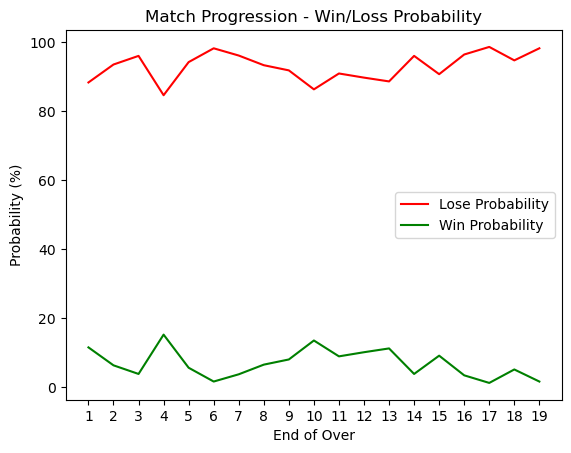

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute match progression once to avoid redundant computations
match_5_df, _ = match_progression(delivery, 5, pipe)
match_1_df, _ = match_progression(delivery, 5, pipe)

# Plot the lines
sns.lineplot(x=match_5_df['end_of_over'], y=match_1_df['lose'], color='red', label="Lose Probability")
sns.lineplot(x=match_5_df['end_of_over'], y=match_1_df['win'], color='green', label="Win Probability")
plt.xticks(match_5_df['end_of_over'].astype(int))

# Add labels and title
plt.xlabel("End of Over")
plt.ylabel("Probability (%)")
plt.title("Match Progression - Win/Loss Probability")
plt.legend()

# Show the plot
plt.show()


In [99]:
delivery[delivery['match_id']==4]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,city,winner,cumulative_runs,run_left,ball_left,cumulative_wicket,wicket_left,curr,req,win


In [100]:
delivery['match_id']=delivery['match_id'].astype(int)

In [111]:
delivery.info()


<class 'pandas.core.frame.DataFrame'>
Index: 73304 entries, 125 to 179077
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_id           73304 non-null  int32  
 1   inning             73304 non-null  int64  
 2   batting_team       73304 non-null  object 
 3   bowling_team       73304 non-null  object 
 4   over               73304 non-null  int64  
 5   ball               73304 non-null  int64  
 6   batsman            73304 non-null  object 
 7   non_striker        73304 non-null  object 
 8   bowler             73304 non-null  object 
 9   is_super_over      73304 non-null  int64  
 10  wide_runs          73304 non-null  int64  
 11  bye_runs           73304 non-null  int64  
 12  legbye_runs        73304 non-null  int64  
 13  noball_runs        73304 non-null  int64  
 14  penalty_runs       73304 non-null  int64  
 15  batsman_runs       73304 non-null  int64  
 16  extra_runs         73304

In [105]:
delivery['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Chennai Super Kings'], dtype=object)

In [106]:
delivery['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', nan, 'Jaipur', 'Chennai', 'Cape Town',
       'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad',
       'Cuttack', 'Nagpur', 'Dharamsala', 'Visakhapatnam', 'Pune',
       'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', 'Mohali', 'Bengaluru'],
      dtype=object)

In [107]:
import pickle

In [109]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))